<a href="https://colab.research.google.com/github/dibbo116/Thesis---Coronary-Artery-Disease-CAD-Prediction-Using-Machine-Learning-Methods/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
readdata=pd.read_csv(r"/content/drive/MyDrive/heart_statlog_cleveland_hungary_final.csv")
data = pd.DataFrame(readdata)
print(data.head())
print(data.shape)
print(data['target'].value_counts())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
(1190, 12)
1    629
0    561
Name: target, dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


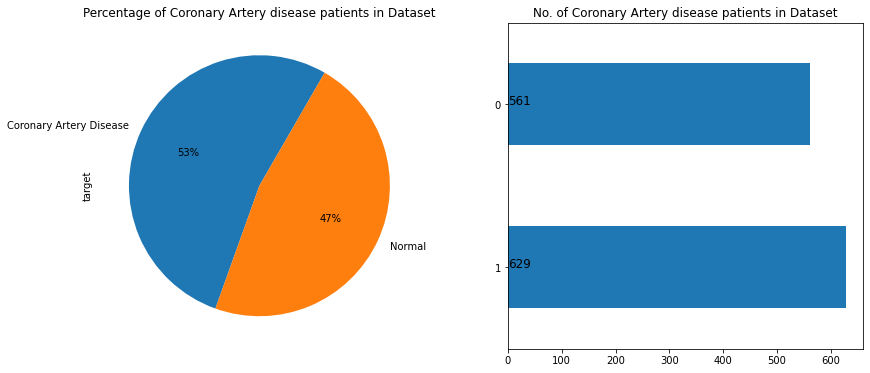

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = data['target'].value_counts().plot.pie( x="Coronary Artery disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Coronary Artery Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Coronary Artery disease patients in Dataset')

ax2 = data["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(data["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Coronary Artery disease patients in Dataset')
plt.show()

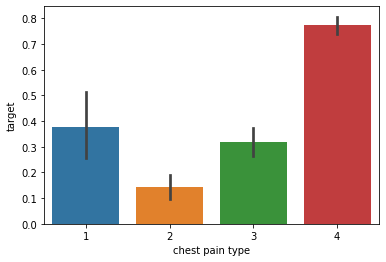

In [ ]:
sns.barplot(x = 'chest pain type', y = 'target', data = data)

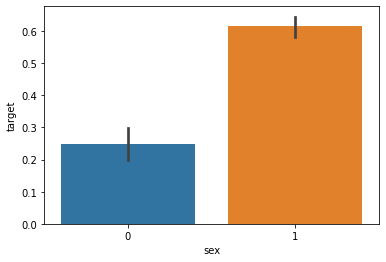

In [ ]:
sns.barplot(x = 'sex', y = 'target', data = data)

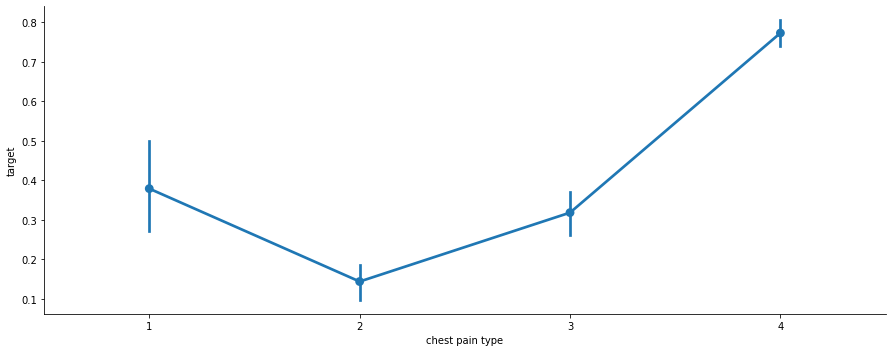

In [ ]:
axes = sns.factorplot('chest pain type','target', 
                      data=data, aspect = 2.5, )

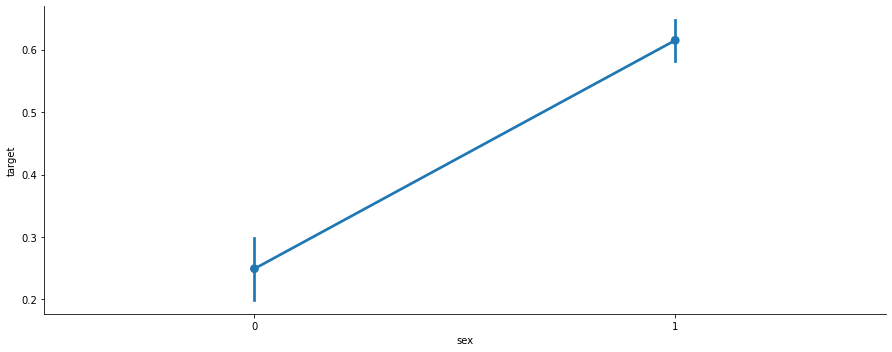

In [ ]:
axes = sns.factorplot('sex','target', 
                      data=data, aspect = 2.5, )

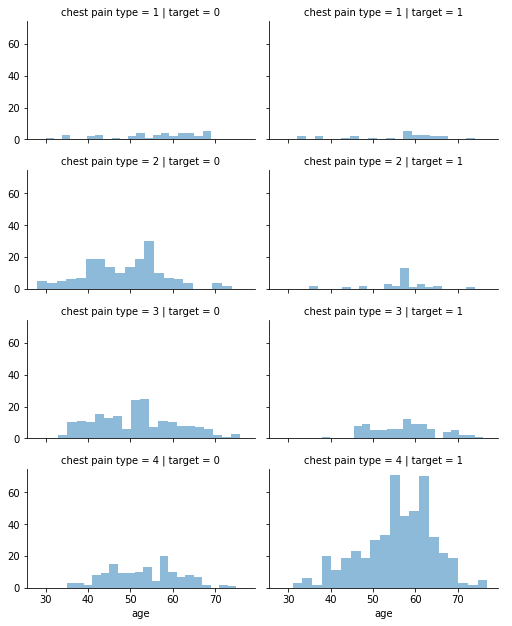

In [ ]:
grid = sns.FacetGrid(data, col='target', row='chest pain type', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

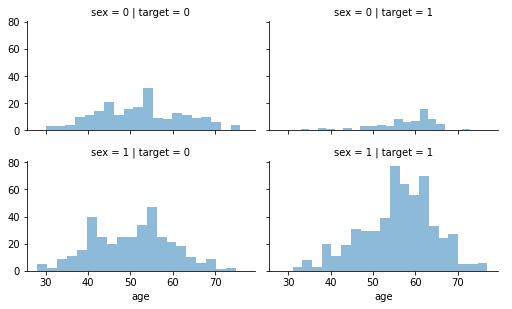

In [ ]:
grid = sns.FacetGrid(data, col='target', row='sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

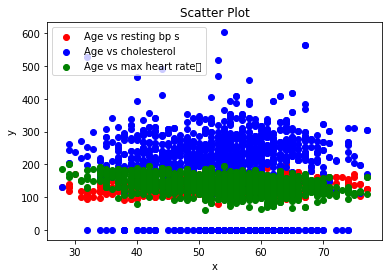

In [ ]:
plt.scatter('age','resting bp s', data = data, label='Age vs resting bp s ',color='r')
plt.scatter('age','cholesterol', data = data, label='Age vs cholesterol',color='b')
plt.scatter('age','max heart rate', data = data, label='Age vs max heart rate	',color='g')
plt.title('Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Resting bps , cholesterol, max heart rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
newdata=data.dropna(axis=0,how='any')
# print(newdata)
print(newdata.shape)
X = data.drop('target', axis=1)
Y = data['target']
Y1=list(Y)
#Y = list(map(lambda x: 1 if x>0 else 0,Y1))
#newx=pd.DataFrame(data.ix[:,[0,1,2,4,5,8,9,10,11]])
#newx=data[data.columns[6]]
#print(newx)
#X = newx
Y=pd.DataFrame(Y)
print(X.shape)
print(Y.shape)
print(Y)
print(X)
type(X)
type(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
print(X_train.mean(), X_test.mean(), X.mean())
Y_train = Y_train.astype(np.int8)

(1190, 12)
(1190, 11)
(1190, 1)
      target
0          0
1          1
2          0
3          1
4          0
...      ...
1185       1
1186       1
1187       1
1188       1
1189       0

[1190 rows x 1 columns]
      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  ma

In [ ]:
initial_number_of_data_points = len(X)
print(initial_number_of_data_points)

def get_unique(X_matrix, y_vector):
    Xy = list(set(list(zip([tuple(x) for x in X_matrix], y_vector))))
    X_matrix = [list(l[0]) for l in Xy]
    y_vector = [l[1] for l in Xy]
    return X_matrix, y_vector


# X, Y = get_unique(X, Y)
# data_points_removed = initial_number_of_data_points - len(X)
# print("Number of duplicates removed:", data_points_removed )

np.unique(Y)

1190


array([0, 1])

In [ ]:
print(initial_number_of_data_points)
print(X.shape)
print(Y.shape)

if X.shape[0] != Y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

1190
(1190, 11)
(1190, 1)


In [ ]:
print(X)
print(Y_train)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

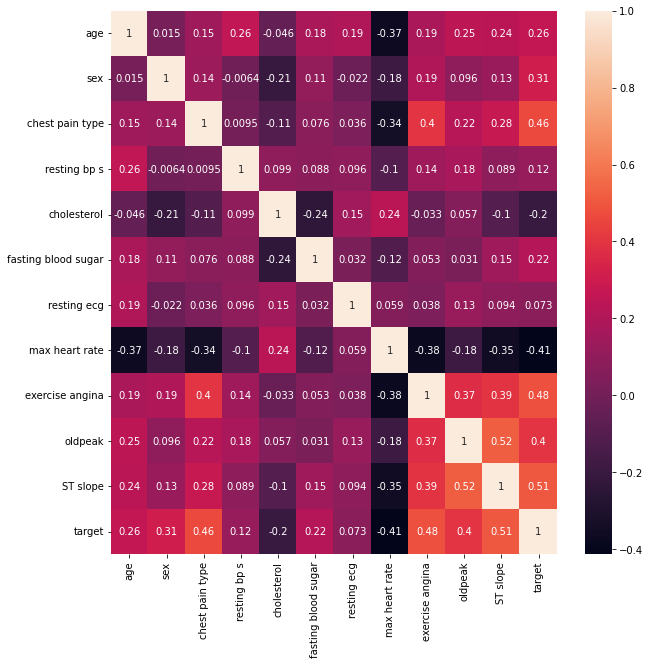

In [ ]:
correlation_mat = data.corr()
plt.figure(figsize=(10,10))
ax=sns.heatmap(correlation_mat, annot = True)
plt.show(ax)

In [ ]:
from sklearn.svm import SVC  
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
svclassifier = SVC(C=3.0,kernel='rbf',gamma='auto')  

svclassifier.fit(X_train, np.ravel(Y_train))

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, np.ravel(Y_train))
grid_predictions = grid.predict(X_test)
accuracy1=accuracy_score(grid_predictions,Y_test)
y_pred = svclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print("Accuracy=",accuracy1*100)
print("Accuracy=",accuracy*100)
print("Precision=",precision*100)
print("Recall=",recall*100)
print("F1=",f1)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=svclassifier,n_estimators=300)
#print(baggclassifier)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=svclassifier,algorithm="SAMME",n_estimators=150)
print("K Fold Validation")
def run_kfold(clf):
    #kf = KFold(303, n_folds=10)
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))

run_kfold(boostclassifier)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.527 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.527 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.527 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.530 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.530 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.527 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.527 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.527 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.530 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.530 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.527 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import KFold
nbclassifier = GaussianNB()  
nbclassifier.fit(X_train, np.ravel(Y_train)) 

from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, np.ravel(Y_train))
GaussianNB(priors=None, var_smoothing=1.0)
y_pred1 = nbModel_grid.predict(X_test)
y_pred = nbclassifier.predict(X_test) 
accuracy1=accuracy_score(y_pred1,Y_test)
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print("Accuracy=",accuracy1*100)
print("Accuracy=",accuracy*100)
print("Precision=",precision*100)
print("Recall=",recall*100)
print("F1=",f1)

print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=nbclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=nbclassifier,algorithm="SAMME",n_estimators=600)
def run_kfold(clf):
    kf = KFold(10,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
        
run_kfold(boostclassifier)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Accuracy= 84.31372549019608
Accuracy= 84.31372549019608
Precision= 84.65608465608466
Recall= 85.56149732620321
F1= 0.851063829787234
Bagging Classifier
Boosting Classifier
Fold 1 accuracy: 0.8487394957983193
Fold 1 precision: 0.8378378378378378
Fold 1 recall: 0.7209302325581395
Fold 1 f1: 0.7749999999999999
Mean Accuracy: 0.8487394957983193
Mean Precision: 0.8378378378378378
Mean Recall: 0.7209302325581395
Mean F1: 0.7749999999999999
Fold 2 accuracy: 0.8571428571428571
Fold 2 precision: 0.8157894736842105
Fold 2 recall: 0.7560975609756098
Fold 2 f1: 0.7848101265822786
Mean Accuracy: 0.8529411764705882
Mean Precision: 0.8268136557610242
Mean Recall: 0.7385138967668746
Mean F1: 0.7799050632911393
Fold 3 accuracy: 0.9243697478991597
Fold 3 precision: 0.9156626506024096
Fold 3 recall: 0.9743589743589743
Fold 3 f1: 0.9440993788819876
Mean Accuracy: 0.876750700280112
Mean Precision: 0.8564299873748192
Mean Recall: 0.81712892263

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfclassifier = RandomForestClassifier(n_estimators=100)  
rfclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = rfclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print("Accuracy=",accuracy*100)
print("Precision=",precision*100)
print("Recall=",recall*100)
print("F1=",f1)
print(sensitivity)
print(specificity)
print("Bagging Classifier")
baggclassifier=BaggingClassifier(base_estimator=rfclassifier,n_estimators=300)
print("Boosting Classifier")
boostclassifier=AdaBoostClassifier(base_estimator=rfclassifier,algorithm="SAMME",n_estimators=150)
def run_kfold(clf):
    kf = KFold(20,shuffle=False)
    outcomesaccuracy = []
    outcomesprecision = []
    outcomesrecall = []
    outcomesf1 = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = Y.values[train_index], Y.values[test_index]
        clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision=precision_score(y_test,predictions)
        recall=recall_score(y_test,predictions)
        f1=2*(precision*recall)/(precision+recall)
        cm=confusion_matrix(Y_test,y_pred)
        sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
        specificity=cm[1,0]/(cm[1,0]+cm[1,1])
        outcomesaccuracy.append(accuracy)
        outcomesprecision.append(precision)
        outcomesrecall.append(recall)
        outcomesf1.append(f1)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        print("Fold {0} precision: {1}".format(fold, precision))
        print("Fold {0} recall: {1}".format(fold, recall))
        print("Fold {0} f1: {1}".format(fold, f1))
        mean_accuracy_outcome = np.mean(outcomesaccuracy)
        mean_precision_outcome = np.mean(outcomesprecision)
        mean_recall_outcome = np.mean(outcomesrecall)
        mean_f1_outcome = np.mean(outcomesf1)
        print("Mean Accuracy: {0}".format(mean_accuracy_outcome)) 
        print("Mean Precision: {0}".format(mean_precision_outcome))
        print("Mean Recall: {0}".format(mean_recall_outcome))
        print("Mean F1: {0}".format(mean_f1_outcome))
        
run_kfold(boostclassifier)

Accuracy= 94.11764705882352
Precision= 97.88359788359789
Recall= 91.58415841584159
F1= 0.9462915601023018
0.8988095238095238
0.021164021164021163
Bagging Classifier
Boosting Classifier
Fold 1 accuracy: 0.9166666666666666
Fold 1 precision: 0.8333333333333334
Fold 1 recall: 0.9523809523809523
Fold 1 f1: 0.888888888888889
Mean Accuracy: 0.9166666666666666
Mean Precision: 0.8333333333333334
Mean Recall: 0.9523809523809523
Mean F1: 0.888888888888889
Fold 2 accuracy: 0.9
Fold 2 precision: 0.8695652173913043
Fold 2 recall: 0.8695652173913043
Fold 2 f1: 0.8695652173913043
Mean Accuracy: 0.9083333333333333
Mean Precision: 0.8514492753623188
Mean Recall: 0.9109730848861284
Mean F1: 0.8792270531400966
Fold 3 accuracy: 0.9166666666666666
Fold 3 precision: 0.9090909090909091
Fold 3 recall: 0.8695652173913043
Fold 3 f1: 0.888888888888889
Mean Accuracy: 0.9111111111111111
Mean Precision: 0.870663153271849
Mean Recall: 0.8971704623878537
Mean F1: 0.8824476650563607
Fold 4 accuracy: 0.9166666666666666


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
nnclassifier = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,10,15,20,25,),activation='relu', random_state=1, max_iter=200)
nnclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = nnclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)

81.5126050420168
82.01058201058201
82.88770053475936
0.8244680851063829


In [ ]:
def rrse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Relative Squared Error """
    return np.sqrt(np.sum(np.square(actual - predicted)) / np.sum(np.square(actual - np.mean(actual))))

def rae(actual: np.ndarray, predicted: np.ndarray):
    """ Relative Absolute Error (aka Approximation Error) """
    EPSILON = 1e-10
    return np.sum(np.abs(actual - predicted)) / (np.sum(np.abs(actual - np.mean(actual))) + EPSILON)

In [ ]:
models = []
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
models.append(('SVM',SVC(kernel='linear')))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('NN', MLPClassifier()))

names = []
scores = []
rae_li = [] # Relative Absolute Error
rrse_li = []

for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(Y_test, y_pred)*100.0)

    np_y_test = Y_test.to_numpy().reshape(X_test.shape[0])
    rae_li.append(rae(np_y_test, y_pred)*100 )
    rrse_li.append(rrse(np_y_test, y_pred)*100 -50)

    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores, 'RAE': rae_li, 'RRSE': rrse_li})
print(tr_split)

  Name      Score        RAE       RRSE
0  SVM  83.753501  32.605820  30.753725
1   NB  84.313725  31.481481  29.349205
2   RF  93.557423  12.929894   0.852520
3   NN  78.991597  42.162698  41.828861


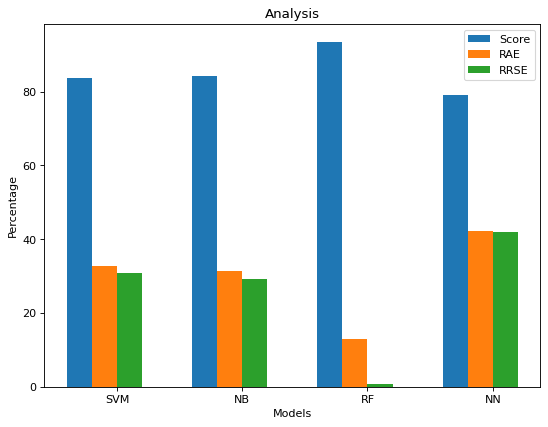

In [ ]:
# import seaborn as sns
# axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split, hue='Metrics')
# axis.set(xlabel='Classifier', ylabel='Accuracy')
# for p in axis.patches:
#     height = p.get_height()
#     axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
# plt.show()

import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

X = ['SVM', 'NB', 'RF','NN']
bar1 = tr_split['Score']
bar2 = tr_split['RAE']
bar3 = tr_split['RRSE']

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, bar1, 0.2, label = 'Score')
plt.bar(X_axis - 0.1, bar2, 0.2, label = 'RAE')
plt.bar(X_axis + 0.1, bar3, 0.2, label = 'RRSE')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Percentage")
plt.title("Analysis")
plt.legend()
plt.show()

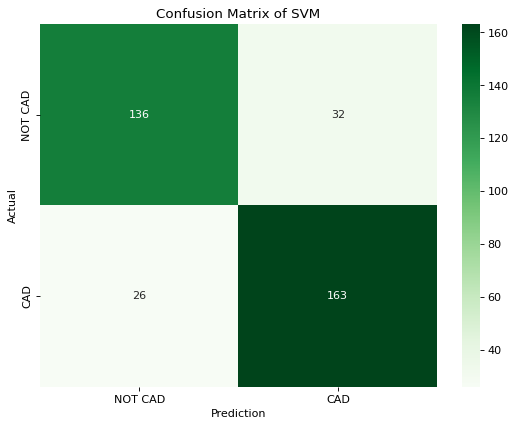

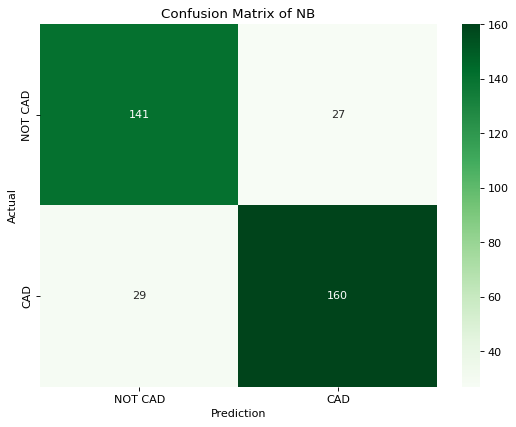

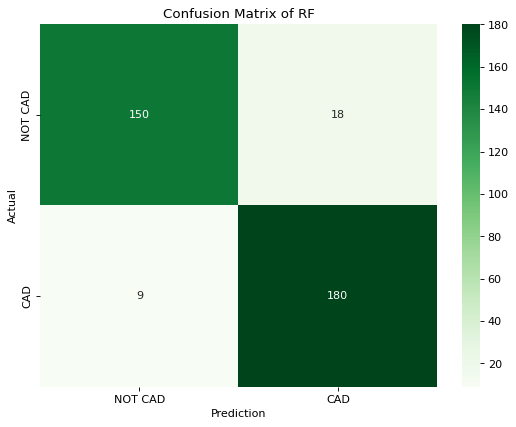

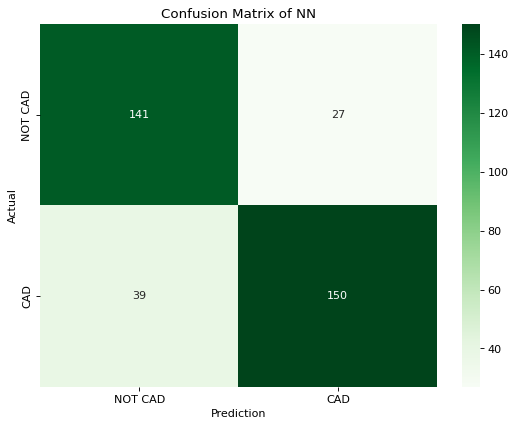

In [ ]:
#Plot the confusion matrix to understand the classification in detail
from keras.utils.np_utils import to_categorical   

for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    categorical_y_pred = to_categorical(y_pred, num_classes=2)

    np_y_test = Y_test.to_numpy().reshape(X_test.shape[0])
    categorical_y_test = to_categorical(np_y_test, num_classes=2)

    pred_ls = np.argmax(categorical_y_pred, axis=1)
    test_ls = np.argmax(categorical_y_test, axis=1)

    conf_arr = confusion_matrix(test_ls, pred_ls)

    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    CLASSES = ['NOT CAD', 'CAD']

    ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

    plt.title('Confusion Matrix of ' + str(name))
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.show(ax)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
nnclassifier = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,10,15,20,25,),activation='relu', random_state=1, max_iter=200)
nnclassifier.fit(X_train, np.ravel(Y_train)) 
y_pred = nnclassifier.predict(X_test) 
accuracy=accuracy_score(y_pred,Y_test)
precision=precision_score(y_pred,Y_test)
recall=recall_score(y_pred,Y_test)
f1=2*(precision*recall)/(precision+recall)
cm=confusion_matrix(Y_test,y_pred)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,0]/(cm[1,0]+cm[1,1])
print(accuracy*100)
print(precision*100)
print(recall*100)
print(f1)

80.95238095238095
80.42328042328042
83.06010928961749
0.8172043010752689
